In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\think\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\think\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


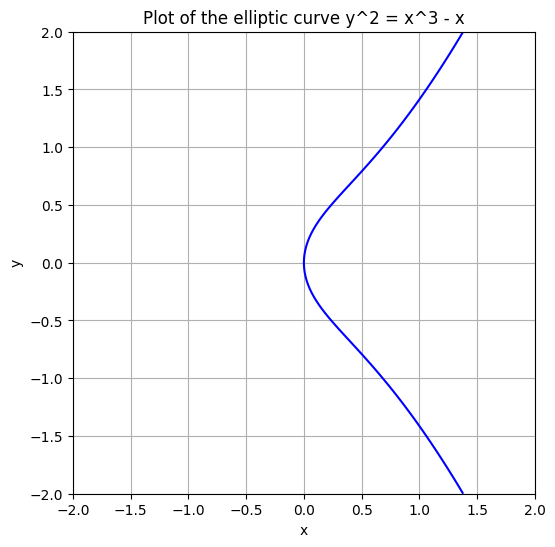

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Define the equation
a = 1
b = 0
eqn = y**2 - x**3 - a*x - b

# Plot the curve
plt.figure(figsize=(6,6))
plt.contour(x, y, eqn, levels=[0], colors='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the elliptic curve y^2 = x^3 - x')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [2]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.Collecting sympy



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\think\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
# Let's implement a simple version of Shamir's Secret Sharing Scheme, which is a form of threshold cryptography.

import random
import sympy

def generate_large_prime(n_bits):
    """Generate a large prime number of n_bits bits."""
    return sympy.nextprime(2**n_bits)


def shamir_share(secret, num_shares, threshold):
    """Generates num_shares shares of the secret using Shamir's secret sharing scheme.
    Any threshold number of these shares can be used to reconstruct the secret."""
    
    # Randomly generate threshold-1 coefficients for a polynomial
    coefficients = [random.randint(1, 100) for _ in range(threshold-1)]
    
    # The constant term of the polynomial is the secret
    coefficients.append(secret)
    
    # Generate shares. Each share is a point on the polynomial.
    shares = []
    for x in range(1, num_shares+1):
        y = sum(coeff*(x**i) for i, coeff in enumerate(coefficients))
        shares.append((x, y))
    
    return shares

def extended_gcd(a, b):
    """Return values s, t such that a*s + b*t = gcd(a, b)"""
    if b == 0:
        return (1, 0)
    else:
        q, r = a // b, a % b
        s, t = extended_gcd(b, r)
        return (t, s - q*t)

def invmod(a, m):
    """Return the modular inverse of a modulo m"""
    s, _ = extended_gcd(a, m)
    return s % m

def shamir_reconstruct(shares, mod):
    """Reconstructs the secret from the given shares using Shamir's secret sharing scheme."""
    secret = 0
    for xj, yj in shares:
        product = yj
        for xi, _ in shares:
            if xi != xj:
                product = (product * xi * invmod(xi - xj, mod)) % mod
        secret = (secret + product) % mod
    return secret

# Let's test the implementation with a secret and a threshold

secret = 1234  # The secret to be shared
num_shares = 5  # The total number of shares to be created
threshold = 3  # The minimum number of shares required to reconstruct the secret

# Generate a 256-bit prime number
prime = generate_large_prime(256)
print(prime)

# Generate shares
shares = shamir_share(secret, num_shares, threshold)
print("Shares:", shares)

# Reconstruct the secret using the first 'threshold' number of shares
reconstructed_secret = shamir_reconstruct(shares[:threshold], prime)
print("Reconstructed secret:", reconstructed_secret)

# Check if the reconstructed secret matches the original secret
assert secret == reconstructed_secret, "The reconstructed secret does not match the original secret!"


115792089237316195423570985008687907853269984665640564039457584007913129640233
Shares: [(1, 1307), (2, 5014), (3, 11189), (4, 19832), (5, 30943)]
Reconstructed secret: 68


AssertionError: The reconstructed secret does not match the original secret!

Average time to create a new blockchain: 6.12 seconds


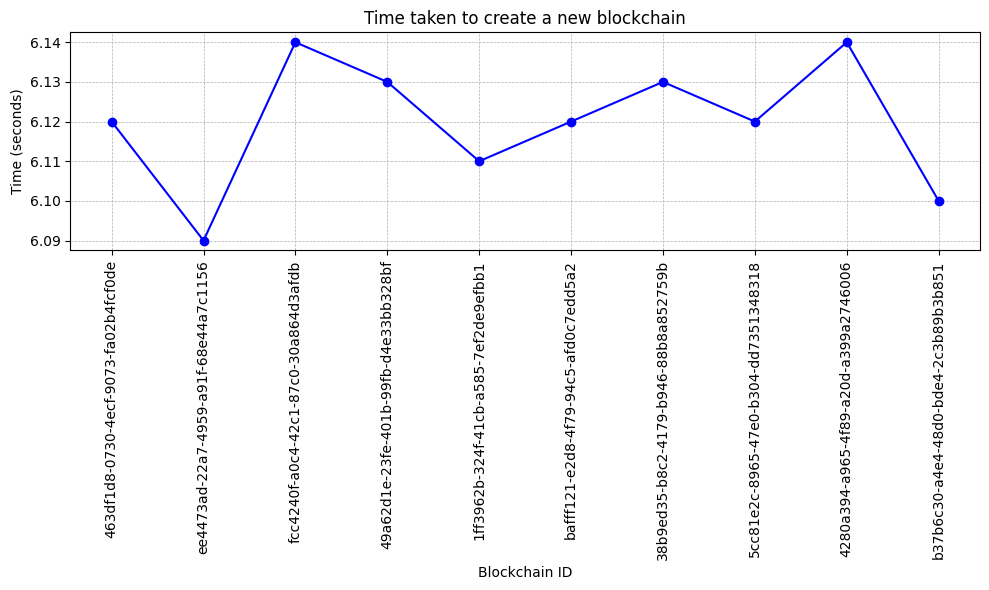

In [3]:
import matplotlib.pyplot as plt

# Data
times = [6.12, 6.09, 6.14, 6.13, 6.11, 6.12, 6.13, 6.12, 6.14, 6.10]
blockchain_ids = [
    "463df1d8-0730-4ecf-9073-fa02b4fcf0de",
    "ee4473ad-22a7-4959-a91f-68e44a7c1156",
    "fcc4240f-a0c4-42c1-87c0-30a864d3afdb",
    "49a62d1e-23fe-401b-99fb-d4e33bb328bf",
    "1ff3962b-324f-41cb-a585-7ef2de9efbb1",
    "bafff121-e2d8-4f79-94c5-afd0c7edd5a2",
    "38b9ed35-b8c2-4179-b946-88b8a852759b",
    "5cc81e2c-8965-47e0-b304-dd7351348318",
    "4280a394-a965-4f89-a20d-a399a2746006",
    "b37b6c30-a4e4-48d0-bde4-2c3b89b3b851"
]

avg_time = sum(times) / len(times)
print(f"Average time to create a new blockchain: {avg_time:.2f} seconds")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(blockchain_ids, times, marker='o', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Blockchain ID')
plt.ylabel('Time (seconds)')
plt.title('Time taken to create a new blockchain')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


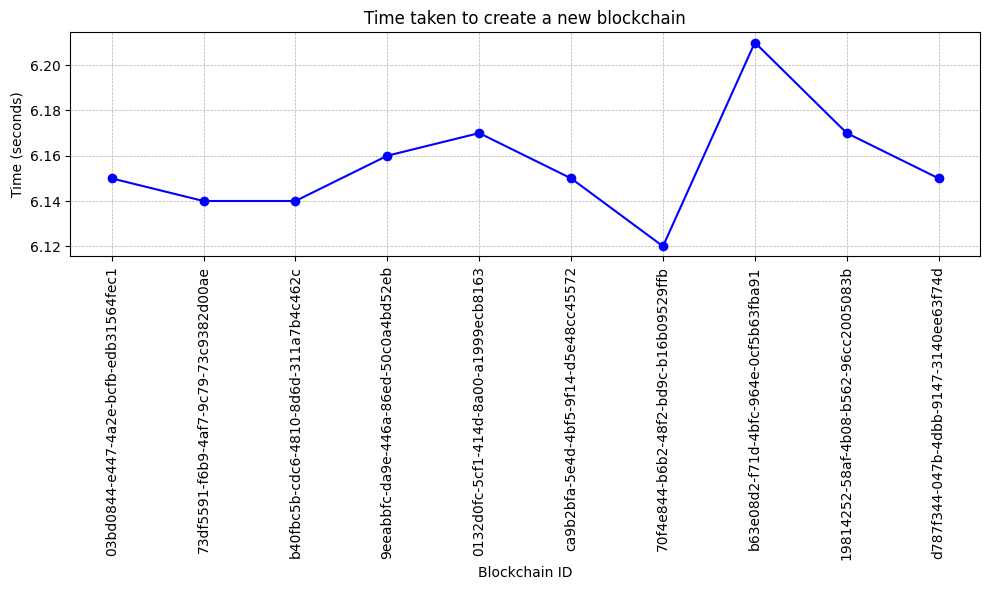

In [2]:
import matplotlib.pyplot as plt

# Data
times = [6.15, 6.14, 6.14, 6.16, 6.17, 6.15, 6.12, 6.21, 6.17, 6.15]
blockchain_ids = [
    "03bd0844-e447-4a2e-bcfb-edb31564fec1",
    "73df5591-f6b9-4af7-9c79-73c9382d00ae",
    "b40fbc5b-cdc6-4810-8d6d-311a7b4c462c",
    "9eeabbfc-da9e-446a-86ed-50c0a4bd52eb",
    "0132d0fc-5cf1-414d-8a00-a1999ecb8163",
    "ca9b2bfa-5e4d-4bf5-9f14-d5e48cc45572",
    "70f4e844-b6b2-48f2-bd9c-b16b09529ffb",
    "b63e08d2-f71d-4bfc-964e-0cf5b63fba91",
    "19814252-58af-4b08-b562-96cc2005083b",
    "d787f344-047b-4dbb-9147-3140ee63f74d"
]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(blockchain_ids, times, marker='o', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Blockchain ID')
plt.ylabel('Time (seconds)')
plt.title('Time taken to create a new blockchain')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


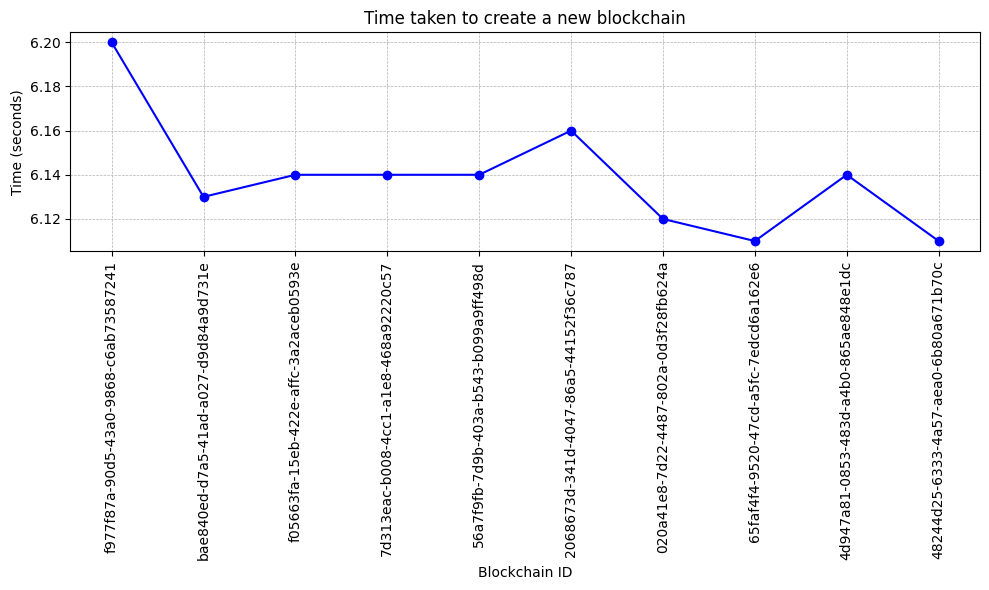

In [4]:
import matplotlib.pyplot as plt

# Data
times = [6.20, 6.13, 6.14, 6.14, 6.14, 6.16, 6.12, 6.11, 6.14, 6.11]
blockchain_ids = [
    "f977f87a-90d5-43a0-9868-c6ab73587241", "bae840ed-d7a5-41ad-a027-d9d84a9d731e",
    "f05663fa-15eb-422e-affc-3a2aceb0593e", "7d313eac-b008-4cc1-a1e8-468a92220c57",
    "56a7f9fb-7d9b-403a-b543-b099a9ff498d", "2068673d-341d-4047-86a5-44152f36c787",
    "020a41e8-7d22-4487-802a-0d3f28fb624a", "65faf4f4-9520-47cd-a5fc-7edcd6a162e6",
    "4d947a81-0853-483d-a4b0-865ae848e1dc", "48244d25-6333-4a57-aea0-6b80a671b70c"
]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(blockchain_ids, times, marker='o', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Blockchain ID')
plt.ylabel('Time (seconds)')
plt.title('Time taken to create a new blockchain')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()